In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

import wrangle

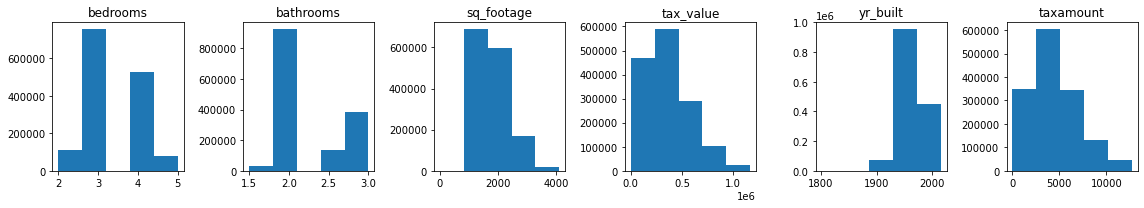

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,bedrooms,bathrooms,sq_footage,tax_value,yr_built,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0
23,3.0,2.5,1821.0,537949.0,2013.0,6173.72,6059.0


In [5]:
df.apply(wrangle.minMax)

,bedrooms,bathrooms,sq_footage,tax_value,yr_built,taxamount,fips
min,2.0,1.5,2.0,22.0,1801.0,16.48,6037.0
max,5.0,3.0,4107.0,1164536.0,2016.0,12686.52,6111.0


In [6]:
df.shape

(1475147, 7)

In [7]:
#Split data into train, validate and test using split_data function in wrangle.py
train, validate, test = wrangle.split_data(df)

In [8]:
train.shape

(826081, 7)

In [9]:
train

,bedrooms,bathrooms,sq_footage,tax_value,yr_built,taxamount,fips
278237,3.0,2.0,1644.0,405574.0,1962.0,4833.68,6059.0
245132,3.0,2.0,1312.0,366057.0,1957.0,4372.48,6059.0
1369940,3.0,3.0,1524.0,177000.0,1990.0,3295.43,6037.0
1533627,3.0,2.0,1696.0,681822.0,1962.0,7983.41,6037.0
181419,3.0,2.0,1092.0,251452.0,1972.0,3285.26,6059.0
...,...,...,...,...,...,...,...
526708,2.0,1.5,1234.0,72525.0,1964.0,752.62,6059.0
169619,4.0,2.0,1251.0,242527.0,1955.0,2981.02,6059.0
838674,3.0,2.5,2248.0,323245.0,1976.0,3385.82,6059.0
1566281,4.0,3.0,1497.0,493659.0,1949.0,5985.71,6037.0


### Min-Max Scaling

Text(0.5, 1.0, 'Scaled')

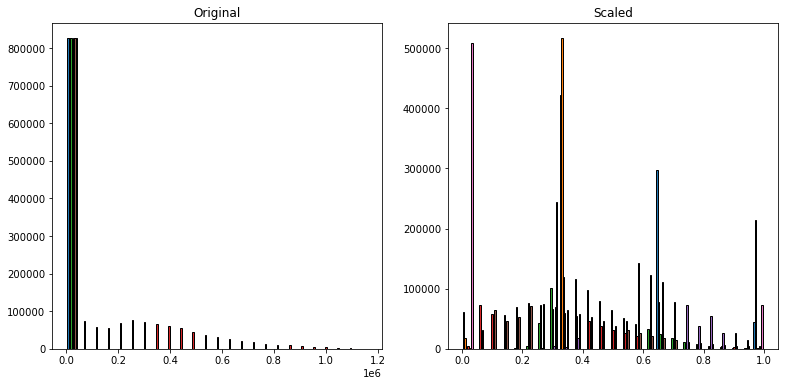

In [11]:
# 1. create the object
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.

# 2. fit the object (learn the min and max value)
scaler.fit(train)

# 3. use the object (use the min, max to do the transformation)
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')

In [12]:
scaler.inverse_transform(train)

array([[1.10000000e+01, 4.50000000e+00, 6.74533500e+06, ...,
        2.98127000e+05, 6.12429354e+07, 4.54403000e+05],
       [1.10000000e+01, 4.50000000e+00, 5.38313900e+06, ...,
        2.97372000e+05, 5.53995130e+07, 4.54403000e+05],
       [1.10000000e+01, 6.00000000e+00, 6.25297500e+06, ...,
        3.02355000e+05, 4.17532464e+07, 4.52775000e+05],
       ...,
       [1.10000000e+01, 5.25000000e+00, 9.22354700e+06, ...,
        3.00241000e+05, 4.28984913e+07, 4.54403000e+05],
       [1.40000000e+01, 6.00000000e+00, 6.14219400e+06, ...,
        2.96164000e+05, 7.58392016e+07, 4.52775000e+05],
       [1.40000000e+01, 4.50000000e+00, 6.78636500e+06, ...,
        2.98429000e+05, 4.74069983e+07, 4.54403000e+05]])

In [27]:
train_scaled

array([[-0.4307273 , -0.4307273 , -0.09234187, ...,  0.        ,
         0.28176834,  0.76470967],
       [-0.4307273 , -0.4307273 , -0.92643708, ..., -0.35549042,
         0.11211209,  0.76470967],
       [-0.4307273 ,  5.19933758, -0.35490646, ...,  1.24266374,
        -0.34820391, -5.19933758],
       ...,
       [-0.4307273 ,  0.4307273 ,  0.84138502, ...,  0.66205417,
        -0.30601006,  0.76470967],
       [ 0.76470967,  5.19933758, -0.41872712, ..., -0.99969049,
         0.67869297, -5.19933758],
       [ 0.76470967, -0.4307273 , -0.07345828, ...,  0.1397103 ,
        -0.14435845,  0.76470967]])

In [14]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=10,output_distribution='normal', random_state=0)
qt.fit_transform(train)

array([[-0.4307273 , -0.4307273 , -0.09234187, ...,  0.        ,
         0.28176834,  0.76470967],
       [-0.4307273 , -0.4307273 , -0.92643708, ..., -0.35549042,
         0.11211209,  0.76470967],
       [-0.4307273 ,  5.19933758, -0.35490646, ...,  1.24266374,
        -0.34820391, -5.19933758],
       ...,
       [-0.4307273 ,  0.4307273 ,  0.84138502, ...,  0.66205417,
        -0.30601006,  0.76470967],
       [ 0.76470967,  5.19933758, -0.41872712, ..., -0.99969049,
         0.67869297, -5.19933758],
       [ 0.76470967, -0.4307273 , -0.07345828, ...,  0.1397103 ,
        -0.14435845,  0.76470967]])

In [15]:
train_scaled = qt.transform(train)

Text(0.5, 1.0, 'Scaled')

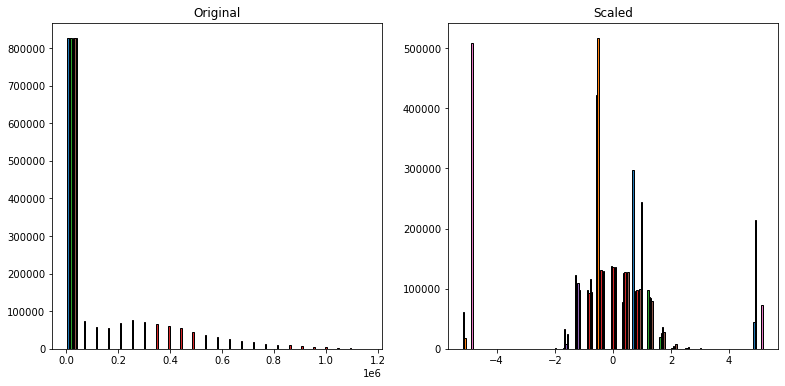

In [41]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')

In [19]:
train.columns

Index(['bedrooms', 'bathrooms', 'sq_footage', 'tax_value', 'yr_built',
       'taxamount', 'fips'],
      dtype='object')